# Projet développement logiciel - HMMA 238



  ### TP°1

   #### Ryma Lakehal

## Exercice 1 - Le jeu de la vie

<img src="https://raw.githubusercontent.com/rymlak/Projet-Dev-Log/master/Images/F1.jpg" width="500">

In [18]:
filename = "HMMA238_TP_rymalakehal.ipynb"

taille_str = len(filename)
print(taille_str)

ma_graine = taille_str % 6
print("ma graine est :", ma_graine)

28
ma graine est : 4


## Implémentation sans numpy

Par la suite, les fonctions définies sont placées dans un fichier **utils.py** que l'on appellera depuis le notebook.

On va fournir ci-dessous le code Python pour coder ce jeu. Dans la suite on va coder les cellules vivantes par des 1 et les cellules mortes par des 0.   

Tout d'abord on définit la fonction **calcul_nb_voisins** :

In [19]:
from utils import calcul_nb_voisins

Appliquons la fonction précédente à la liste **Z** suivante :

In [20]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]

N=calcul_nb_voisins(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

la sortie obtenue **N=calcul_nb_voisins(Z)** représente le nombre de cellules voisines (huit) vivantes de chaque cellule, avec le partour de la grille est toujours inactif

On définit une fonction **iteration_jeu(Z)** et on l'applique à la liste **Z**

In [21]:
from utils import iteration_jeu
help(iteration_jeu)

Help on function iteration_jeu in module utils:

iteration_jeu(Z)
    Simulation d'un jeu de la vie 
    
    Arguments : 
    Z : 2D liste de listes composée de 0 et 1 d'un jeu de la vie donnée
        
    Cette fonction applique les regles du jeu de la vie de 'Conway':
    Toute cellule morte ayant exactement 3 voisins vivants on lui affecte la valeur 1.
    Toute cellule vivante ayant 0, 1 ou 4 voisins vivants meurt à la génération suivante, on lui affecte 0.
    Sinon la cellule garde la meme valeur.
    
    LA fonction 'iteration_jeu' realise une simulation d'un tour du jeu pour une liste Z donnée.



In [22]:
iteration_jeu(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Maintenant, on affiche les étapes du jeu de 0 à 9 itérations pour la liste **Z**. On utilisera la fonction **subplot** de **matplotlib** pour afficher sur 2 lignes et 5 colonnes ces 10 matrices.

Pour ce faire, on définit la fonction **iterations_steps** :

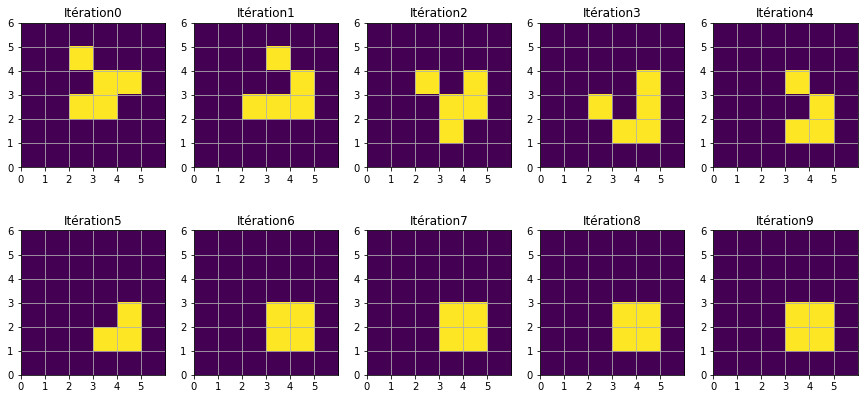

In [23]:
import matplotlib.pyplot as plt

from utils import iterations_steps
iterations_steps(Z)

Nous remarquons que l'itération 0 et 4 ont la même forme, et qu'entre ces deux itérations les cellules se déplacent au sens d'une aiguille d'une montre (de droite à gauche) pour revenir à leur états initials (itération 4)

Après l'itération 7, le nombre de cellules se stabilise à 4 cellules vivantes regroupées (cas **équlibre**).

## Implémentation avec numpy

On a le vecteur suivant :

In [24]:
import numpy as np

vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])

In [25]:
nb_vect

array([0., 0., 1., 1., 1., 0.])

Le vecteur **nb_vect** calcule le nombre de voisins vivants dans le vecteur binaire **vect**, sans tenir compte des bords

On définit la fonction **calcul_nb_voisins_np**, cette fois sur des **array**, qui prend en entrée une matrice Z et qui ressort
le nombre de voisins pour chaque entrée (et qui vaut zéro sur le pourtour).

In [26]:
Z = np.asarray(Z)

from utils import calcul_nb_voisins_np
calcul_nb_voisins_np(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 2, 0],
       [0, 0, 2, 3, 3, 0],
       [0, 0, 2, 3, 3, 0],
       [0, 0, 0, 0, 0, 0]])

On créera une fonction **iteration_jeu_np**, similaire à **iteration_jeu** mais qui prend comme entrée sortie des numpy array et non plus des listes de listes.

In [27]:
from utils import iteration_jeu_np
iteration_jeu_np(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

Maintenant, on définit fonction **jeu_np** qui prend en entrée une matrice initiale **Z_in** et un nombre d'itérations **nb_iter** et sort une matrice (de même taille que Z_in) décrivant l'état du jeu de la vie après nb_iter itérations.

In [29]:
from utils import jeu_np
jeu_np(Z, 8)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

On crée un film qui représente l'évolution du jeu de la vie, quand on initialise avec la matrice **Z_huge**

In [30]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])

Z_huge[10:16, 10:16] = Z_np

In [50]:
from matplotlib import animation 

<IPython.core.display.Javascript object>


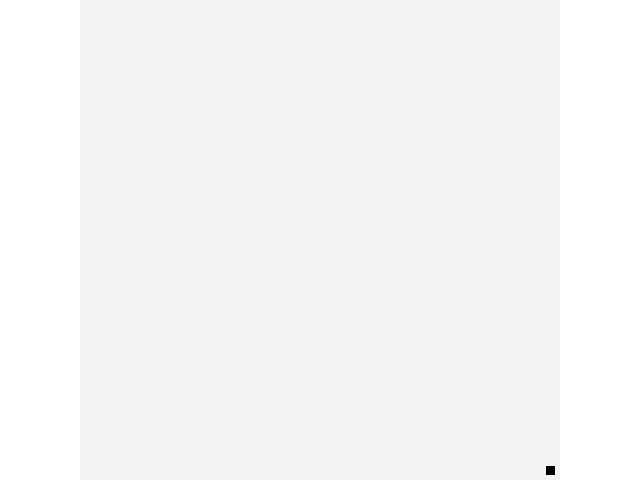

In [75]:
%matplotlib notebook



fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
im = ax.imshow(Z, cmap=plt.cm.binary, interpolation='nearest')
im.set_clim(-0.05, 1)  # Make background gray

# initialization function: plot the background of each frame
def init():
    im.set_data(Z_huge)
    return (im,)

# animation function.  This is called sequentially
def animate():
    
    im.set_data(Z_huge)
    animate.Z = jeu_np(Z_huge,1)
    return im,

animate.Z = Z_huge
#plt.title("Film du  jeu de la vie", frontsize=police())
#plt.colorbar

MyAnimation = animation.FuncAnimation(fig, animate, init_func=init, frames=10, interval=30)

#MyAnimation.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

<IPython.core.display.Javascript object>


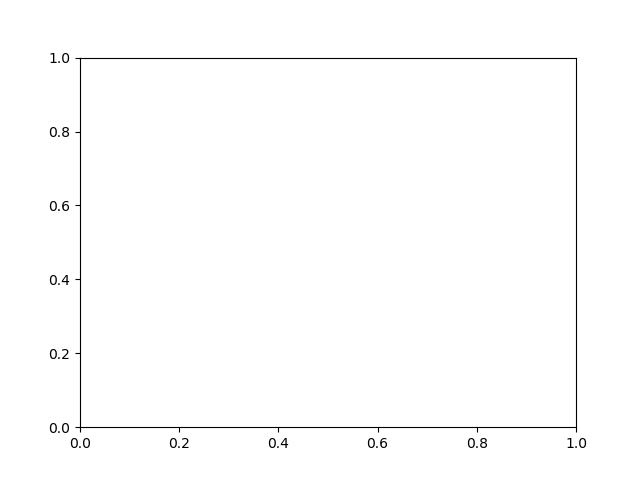

AttributeError: 'tuple' object has no attribute 'canvas'

In [74]:
from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.subplots()
#mat = ax.matshow(Z_huge)

def init():
    im.set_data(Z_huge)
    return (im,)

# Fonction d'animation, elle est appelée séquentiellement en changeant le i.
def animate(i):
   
   # animate.Z = jeu_np(Z_huge,1)
    im.set_data(jeu_np(Z_huge,1))
    return im,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames = 10, interval = 50, save_count=50)
plt.show()

### from IPython.display import HTML

HTML("""<video width = "50%" controls> <source src = "animation.mp4">""")

<IPython.core.display.Javascript object>


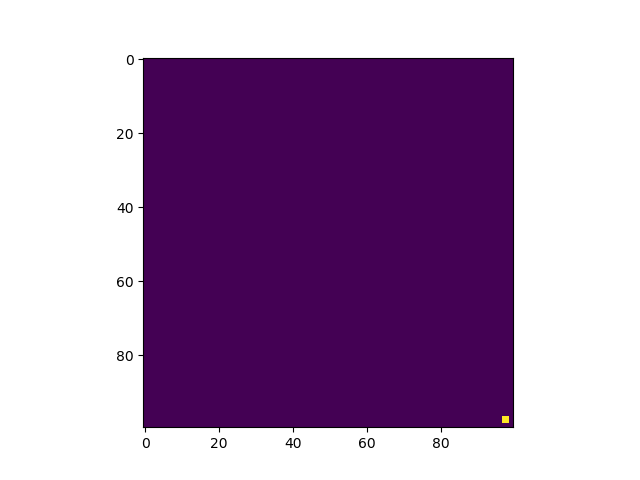

In [58]:
fig=plt.figure()

im = plt.imshow(Z_huge)

def animate(i):
    jeu_np(Z_huge, 1)
    im = plt.imshow(Z_huge)
    return im,

#plt.title("Film du  jeu de la vie", frontsize=police())
plt.colorbar

MyAnimation = animation.FuncAnimation(fig, animate, 9, interval=10, blit=True)

plt.show()

On reprend la question précédente en initialisant avec une matrice aléatoire de taille 100x100, remplie de 1 et de 0, et dont la proportion de 1 est égaleà *prop_active = (1 + ma_graine) * 10 / 100*

In [64]:
prop_active = (1 + ma_graine) * 10 / 100
prop_active

0.5

In [65]:
mat_init = np.random.choice([0,1], 100*100, p=[1-prop_active, prop_active]).reshape(100,100)
mat_init

array([[0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0]])

Traceback (most recent call last):
  File "C:\Users\R\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\R\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "C:\Users\R\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\R\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


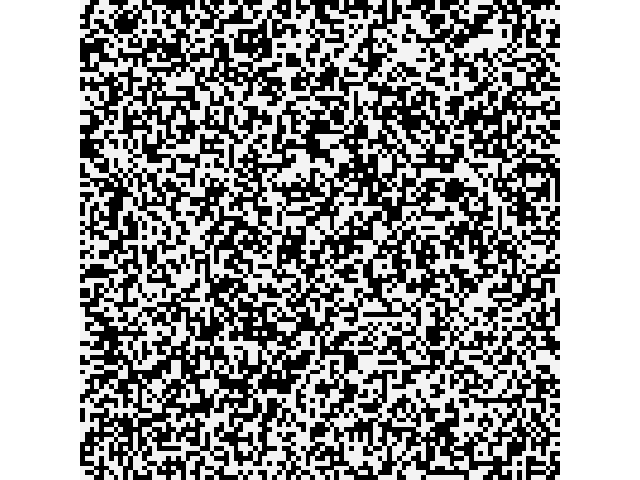

In [72]:
%matplotlib notebook



fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
im = ax.imshow(Z, cmap=plt.cm.binary, interpolation='nearest')
im.set_clim(-0.05, 1)  # Make background gray

# initialization function: plot the background of each frame
def init2():
    im.set_data(mat_init)
    return (im,)

def animate2():
    
    im.set_data(mat_init)
    animate.Z = jeu_np(mat_init,1)
    return im,

animate.Z = mat_init

anim2 = animation.FuncAnimation(fig, animate2, init_func=init2, frames=10, interval=30)

#anim2.save('animation2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

# bla